In [1]:
import numpy
import datetime
import os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import Normalize
from davitpy import utils
from davitpy import gme
import aacgmv2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
inpDir = "../data/"
coords = "mlt"
inpGlatFile = None
inpGlonFile = None
inpTime = datetime.datetime(2014,12,14,22)

In [3]:
def convert_aacgm_geo(row, a2g=False):
    """
    Convert glat, glon values 
    into aacgm coords : MLAT, MLON
    and MLT.
    """
    for col in row.keys():
        if col.isdigit():
            currDate = datetime.datetime.strptime(\
                            col, "%Y%m%d%H%M%S" )
            mlat, mlon = aacgmv2.convert(row["glat"],\
                        row["glon"],\
                        300, currDate)
            mlt = aacgmv2.convert_mlt(mlon,\
                            currDate, m2a=False)
            row["mlat"] = numpy.round( mlat, 2)
            row["mlon"] = numpy.round( mlon, 2)
            row["mlt_" + col] = numpy.round( mlt, 2)
    return row

In [4]:
def convert_geo_to_aacgm(glat, glon, inpTime):
    mlat, mlon = aacgmv2.convert(glat,\
                        glon, 300., inpTime)
    mlt = aacgmv2.convert_mlt(\
            mlon, inpTime, m2a=False)
    return mlat, mlon, mlt

In [5]:
glats = numpy.loadtxt("../data/glat.dat")
glons = numpy.loadtxt("../data/glon.dat")
pix = numpy.log( numpy.loadtxt("../data/20141214220035_detrend.dat") )

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
# Initialize empty arrays
mlats = numpy.zeros(shape=glats.shape)
mlons = numpy.zeros(shape=glats.shape)
mlts = numpy.zeros(shape=glats.shape)
if glats.shape != glons.shape:
    print "glats and glons are not the same size!!"
for x in xrange(glats.shape[0]):
    for y in xrange(glats.shape[1]):
        mlats[x,y], mlons[x,y], mlts[x,y] =\
                convert_geo_to_aacgm(\
                    glats[x,y], glons[x,y], inpTime )

/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3342: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3381: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


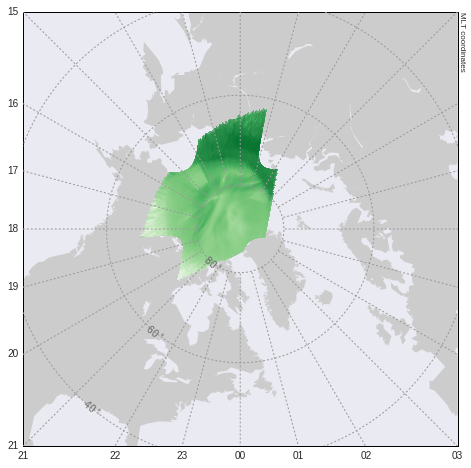

In [7]:
coords = "mlt"
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
# setup a map
m = utils.plotUtils.mapObj(boundinglat=40., coords=coords,\
                           lat_0=90., lon_0=0)
if coords == "geo":
    asiLats = glats
    asiLons = glons
else:
    asiLats = mlats
    if coords == "mag":
        asiLons = mlons
    else:
        asiLons = mlts*15.

        
# asiLats[numpy.isnan(asiLats)] = 0
# asiLons[numpy.isnan(asiLons)] = 0
# pix[numpy.isinf(pix)] = 0
asiLats = numpy.ma.masked_where(\
                numpy.isnan(asiLats),asiLats)
asiLons = numpy.ma.masked_where(\
                numpy.isnan(asiLons),asiLons)
xVecs, yVecs = m(asiLons, asiLats,\
                         coords=coords)        
# xVecs = numpy.ma.masked_where(xVecs>1e10,xVecs)
# yVecs = numpy.ma.masked_where(yVecs>1e10,yVecs)
asiPix = numpy.ma.masked_where(numpy.isinf(pix),pix)
# asiPix = numpy.ma.masked_where(numpy.isinf(pix),pix)# 



# ssusiPlot = m.scatter(xVecs, yVecs, c=pix, s=10.,\
#                        cmap="Greens", alpha=0.5, zorder=7, \
#                                  edgecolor='none', marker="s",\
#                                   vmin=0, vmax=11.)

ssusiPlot = m.pcolor(xVecs, yVecs,\
                            asiPix, zorder=8,
                            vmin=0., vmax=11.,
                            ax=ax, alpha=0.7, cmap="Greens")
ssusiPlot.set_rasterized(True)

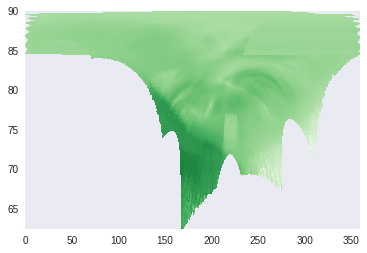

In [8]:
rwCnt1 = 200
rwCnt2=210
plt.pcolormesh(asiLons, asiLats, asiPix,\
               cmap='Greens', vmin=0., vmax=12.)